# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [2]:
# Installing the libraries with the specified version.
!pip install numpy pandas matplotlib seaborn -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [3]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [4]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Write your code here to read the data
df = pd.read_csv('/content/drive/MyDrive/Python AI ML/foodhub_order.csv')

In [6]:
# Write your code here to view the first 5 rows

df.head()
# columns : order_id, restaurant_name, cuisine_type, cost_of_the_order, day_of_the_week, rating, food_preparation_time, delivery_time

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [7]:
# Write your code here

df.shape

(1898, 9)

#### Observations:


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [8]:
# Write your code here

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:


In [9]:
# Finding duplicate entries

df.duplicated().sum()

# No duplicate entries

np.int64(0)

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [10]:
# Write your code here

df.isnull().any()

,0
order_id,False
customer_id,False
restaurant_name,False
cuisine_type,False
cost_of_the_order,False
day_of_the_week,False
rating,False
food_preparation_time,False
delivery_time,False


In [11]:
df['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

In [12]:
df['rating'].apply(type).value_counts()

,count
rating,
<class 'str'>,1898


In [13]:
# Write your code here

df['rating'] = df['rating'].replace('Not given', np.nan)
df['rating'] = df['rating'].astype(float)
df['rating'].unique()

array([nan,  5.,  3.,  4.])

In [14]:
# Write your code here
not_rated_count = df['rating'].isna().sum()

# Treating missing values in the rating column. Grouping the data by restaurant_name and cuisine_type and replacing nan with the mean of the group data
grouped_mean = df.groupby(['restaurant_name'])['rating'].transform('mean')
df['rating'] = df['rating'].fillna(grouped_mean)

df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,4.333333,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.000000,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.000000,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.000000,25,24


#### Observations:


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [15]:
# Write your code here

df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1868.0,NaN,NaN,NaN,4.349154,0.610783,3.0,4.0,4.328125,5.0,5.0
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0


In [16]:
# Write your code here

df['food_preparation_time'].agg(['mean','min','max'])

,food_preparation_time
mean,27.37197
min,20.00000
max,35.00000


#### Observations:


### **Question 5:** How many orders are not rated? [1 mark]

In [17]:
# Write the code here

print(f"Orders not rated: {not_rated_count}")
# Based on the below inference there are total of 736 orders that are not rated

Orders not rated: 736


#### Observations:


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


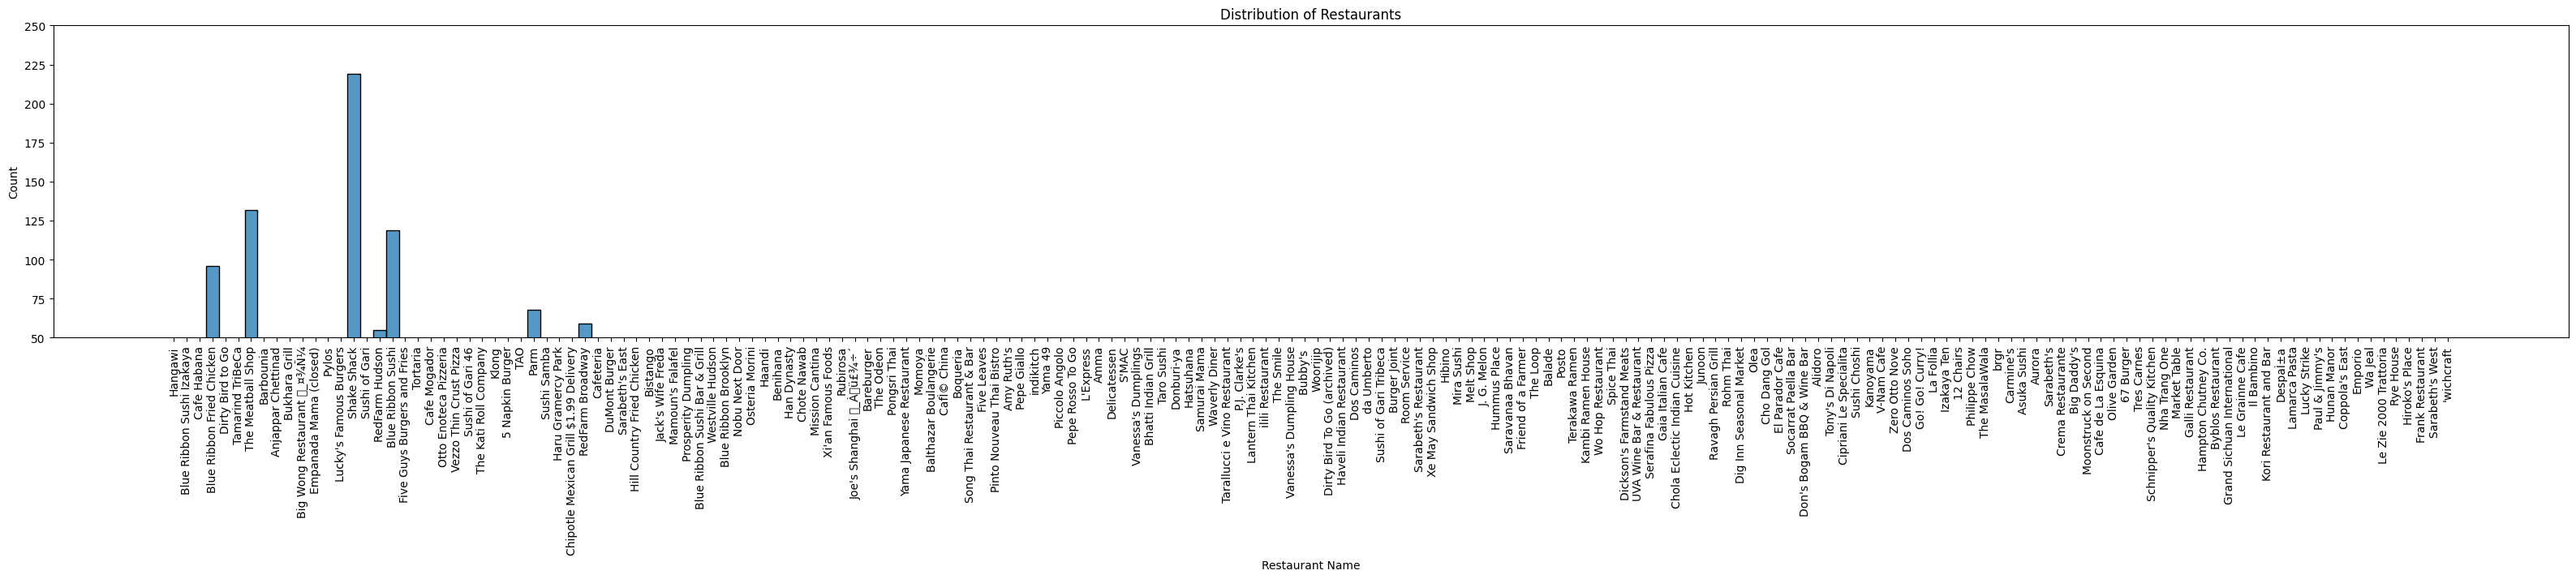

In [18]:
# Write the code here
plt.figure(figsize=(40,5))

sns.histplot(data=df, x='restaurant_name')
plt.xticks(rotation=90)
plt.ylim(50,250)
plt.title('Distribution of Restaurants')
plt.xlabel('Restaurant Name')
plt.ylabel('Count')
plt.show()

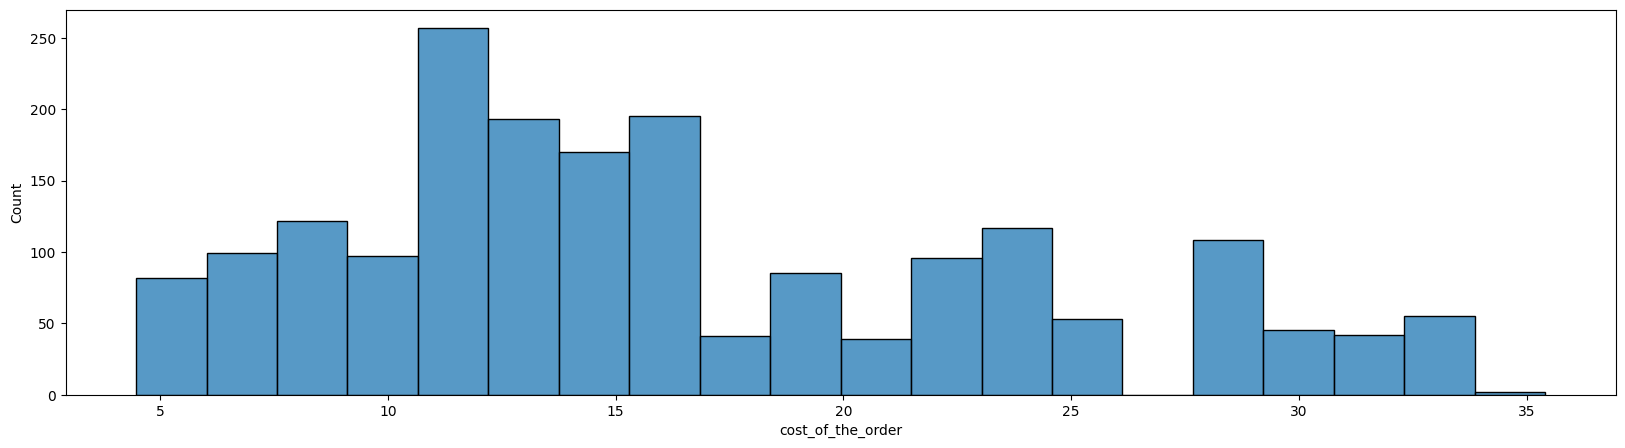

In [19]:
plt.figure(figsize=(20,5))

sns.histplot(data=df, x='cost_of_the_order',bins=20)
plt.show()

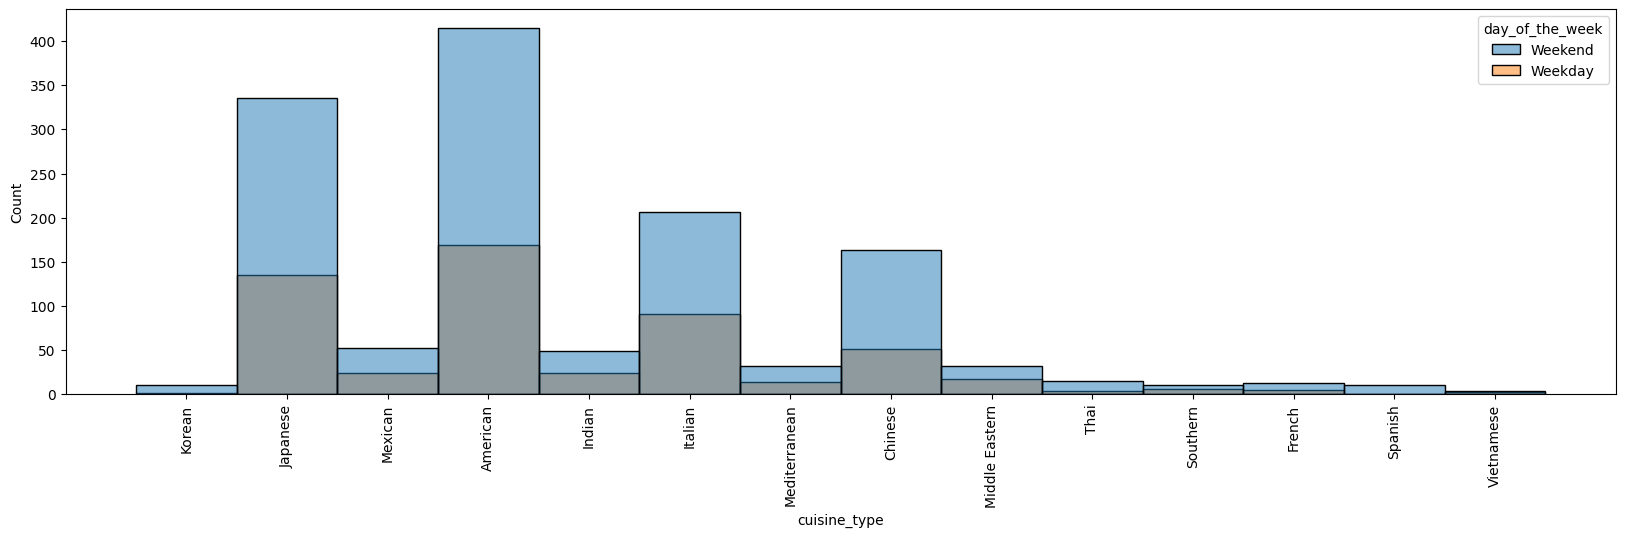

In [20]:
plt.figure(figsize=(20,5))

sns.histplot(data=df, x='cuisine_type', hue='day_of_the_week')
plt.xticks(rotation=90)
plt.show()
# American was most ordered cuisine on weekend/weekday

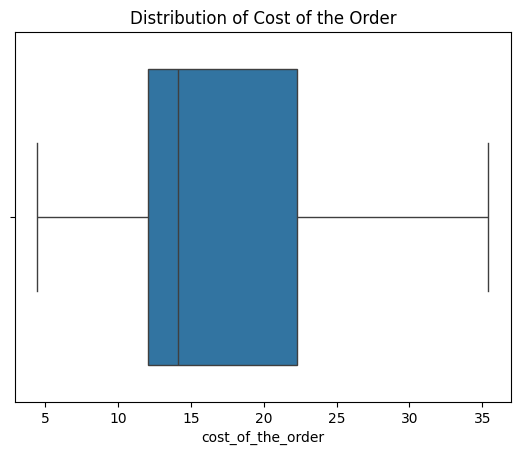

In [21]:
sns.boxplot(data=df, x='cost_of_the_order')
plt.title('Distribution of Cost of the Order')
plt.show()

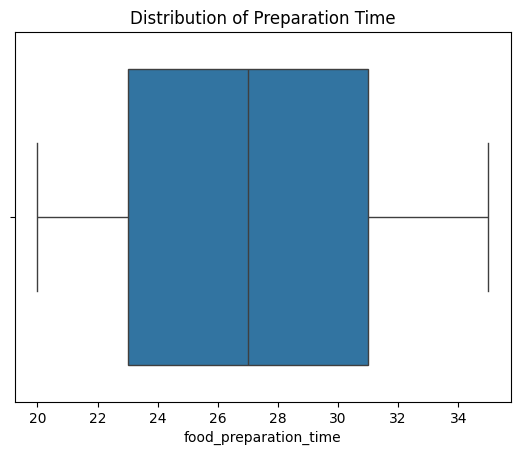

In [22]:
sns.boxplot(data=df, x='food_preparation_time')
plt.title('Distribution of Preparation Time')
plt.show()

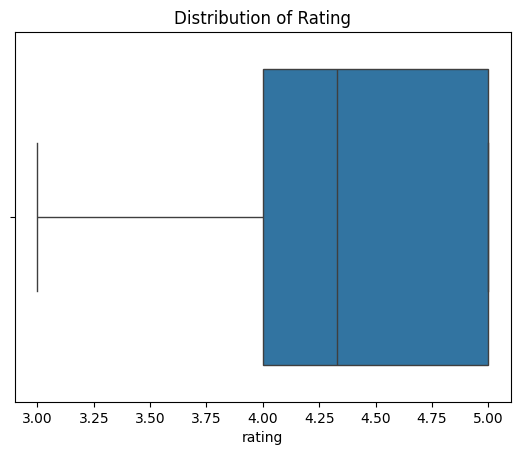

In [23]:
sns.boxplot(data=df, x='rating')
plt.title('Distribution of Rating')
plt.show()

In [49]:
len(df[df['rating']>4])

# 1242 orders has rating > 4

1242

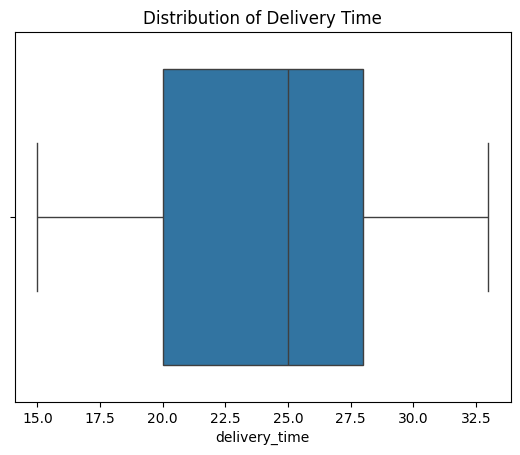

In [24]:
sns.boxplot(data=df, x='delivery_time')
plt.title('Distribution of Delivery Time')
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


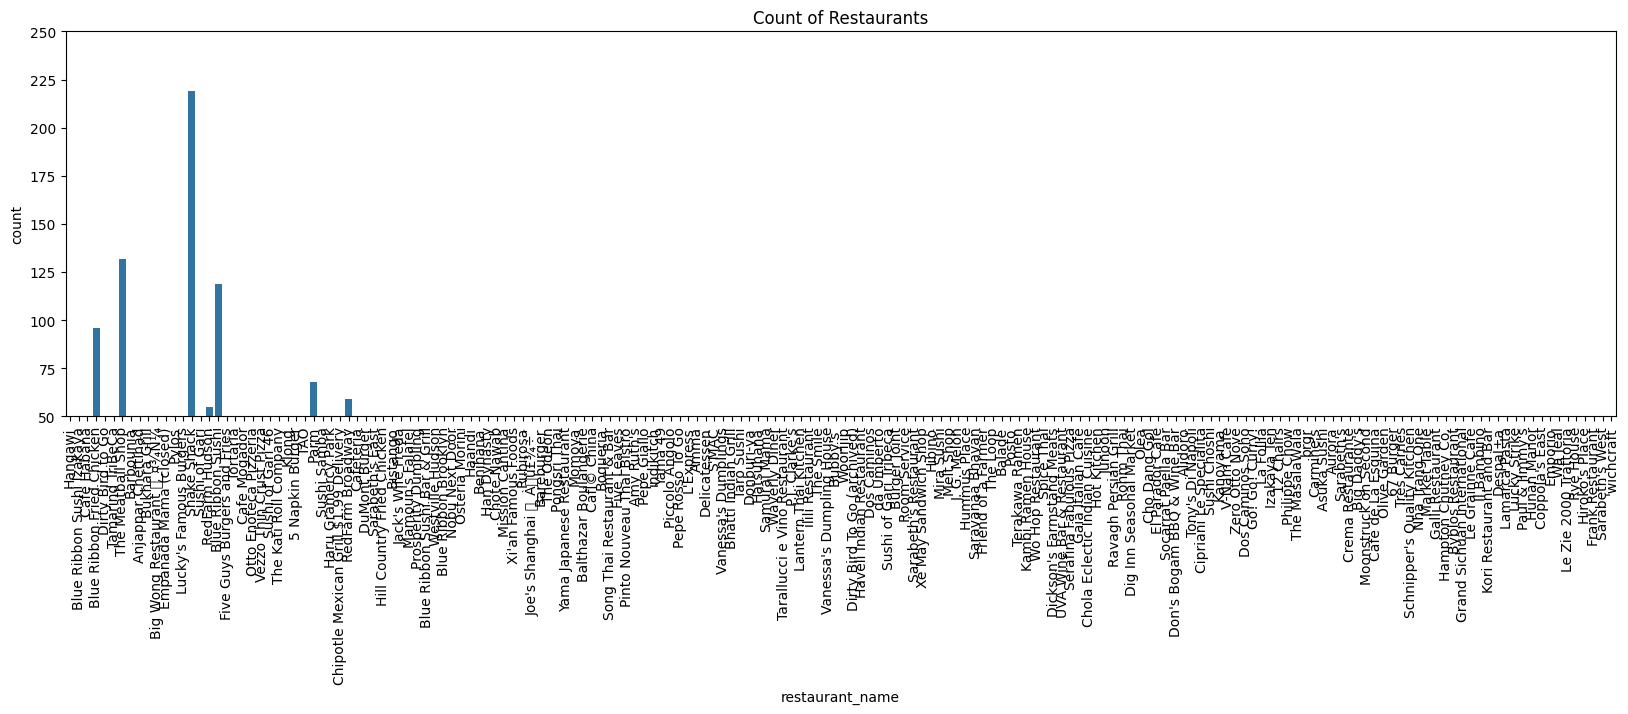

In [25]:
plt.figure(figsize=(20,5))

sns.countplot(data=df, x='restaurant_name')
plt.ylim(50,250)
plt.xticks(rotation=90)
plt.title('Count of Restaurants')
plt.show()

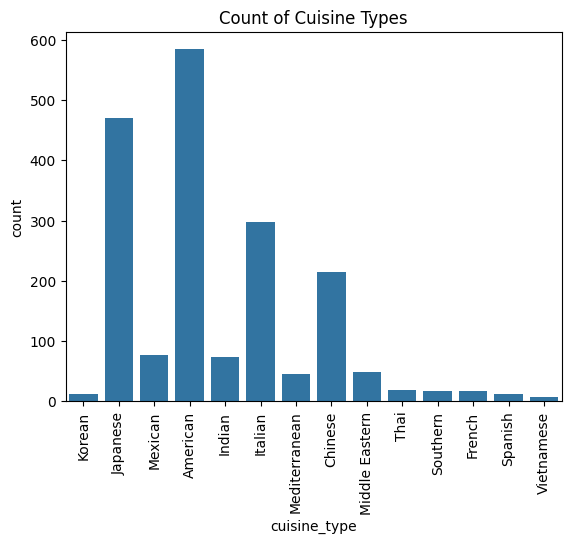

In [26]:
sns.countplot(data=df, x='cuisine_type')
plt.xticks(rotation=90)
plt.title('Count of Cuisine Types')
plt.show()

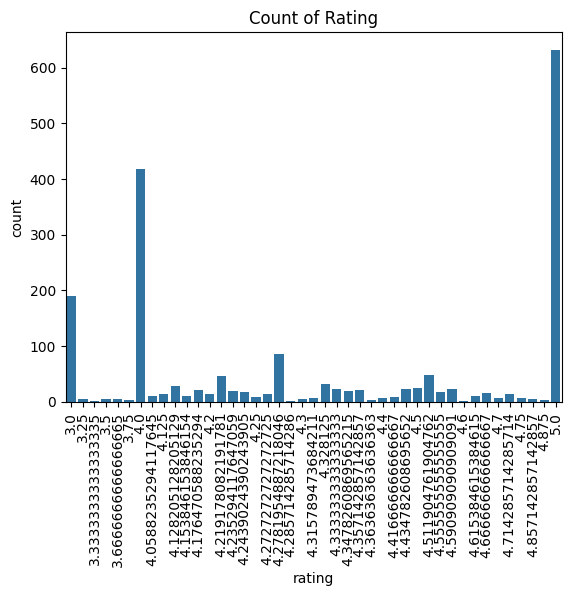

In [27]:
sns.countplot(data=df, x='rating')
plt.xticks(rotation=90)
plt.title('Count of Rating')
plt.show()

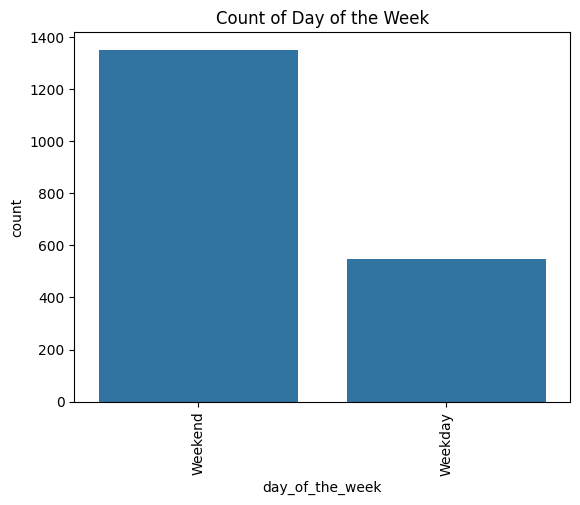

In [28]:
sns.countplot(data=df, x='day_of_the_week')
plt.xticks(rotation=90)
plt.title('Count of Day of the Week')
plt.show()

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [29]:
# Write the code here
top_5_restaurants = df['restaurant_name'].value_counts().head(5).index.to_list()

print(f"The top 5 restaurants in terms of the number of orders received: {top_5_restaurants}")
# Based on the below inference top 5 restaurants in terms of the number of orders received are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, Parm

The top 5 restaurants in terms of the number of orders received: ['Shake Shack', 'The Meatball Shop', 'Blue Ribbon Sushi', 'Blue Ribbon Fried Chicken', 'Parm']


#### Observations:


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [30]:
# Write the code here
popular_cuisine = df[df['day_of_the_week']=='Weekend']['cuisine_type'].value_counts().head(1).index[0]

print(f"The most popular cuisine on weekends: {popular_cuisine}")

# Based on the below inference the most popular cuisine on weekends is American

The most popular cuisine on weekends: American


#### Observations:


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [31]:
# Write the code here
df_len = df.shape[0]
df_gt_20_len = len(df[df['cost_of_the_order'] > 20])
percent_gt_20 = (df_gt_20_len/df_len)*100

print(f"Percentage of the orders cost more than 20 dollars : {percent_gt_20:.2f}%")

Percentage of the orders cost more than 20 dollars : 29.24%


#### Observations:


### **Question 10**: What is the mean order delivery time? [1 mark]

In [32]:
# Write the code here
mean_delivery_time = df['delivery_time'].mean()

print(f"The mean order delivery time: {mean_delivery_time:.2f}%")

The mean order delivery time: 24.16%


#### Observations:


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [33]:
# Write the code here
top3_customers = df['customer_id'].value_counts().head(3)

print(f"The top 3 most frequent customers are:\n{top3_customers}")

The top 3 most frequent customers are:
customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64


#### Observations:


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


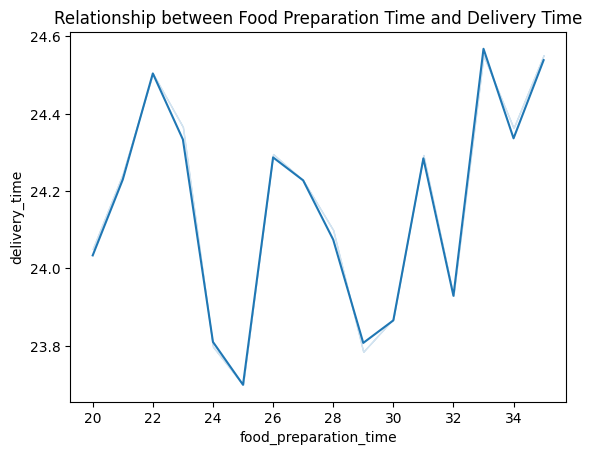

In [34]:
# Write the code here
sns.lineplot(data=df, x='food_preparation_time', y='delivery_time', errorbar=('ci', False))
plt.title('Relationship between Food Preparation Time and Delivery Time')
plt.show()

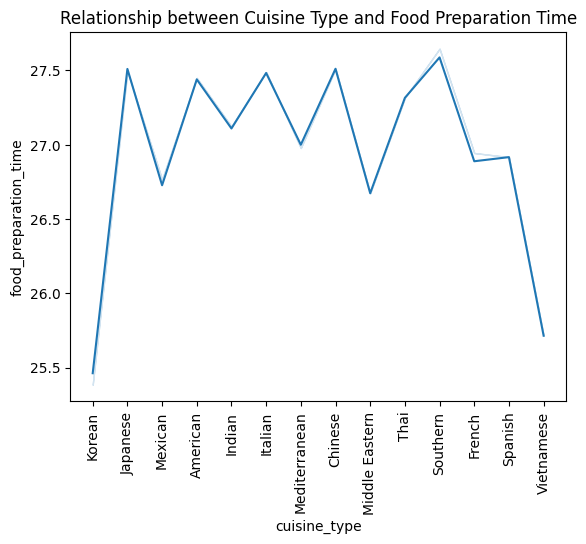

In [35]:
# Write the code here
sns.lineplot(data=df, x='cuisine_type', y='food_preparation_time', errorbar=('ci', False))
plt.xticks(rotation=90)
plt.title('Relationship between Cuisine Type and Food Preparation Time')
plt.show()

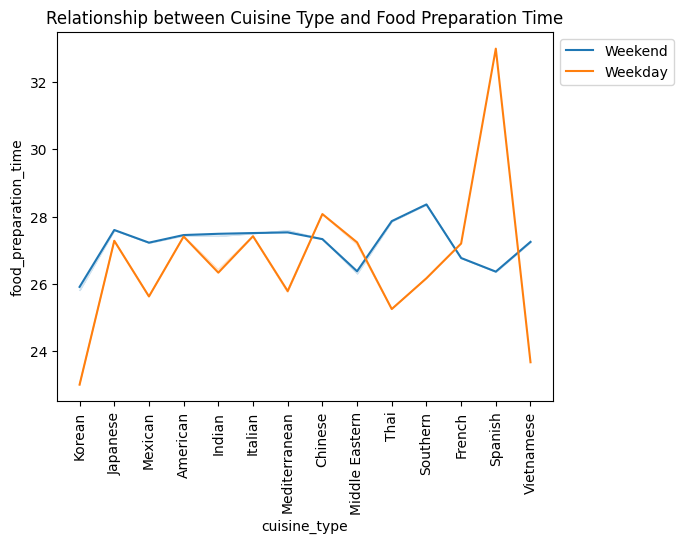

In [36]:
# Write the code here
sns.lineplot(data=df, x='cuisine_type', y='food_preparation_time', hue=('day_of_the_week'), errorbar=('ci', False))
plt.xticks(rotation=90)
plt.title('Relationship between Cuisine Type and Food Preparation Time')
plt.legend(bbox_to_anchor=[1, 1])
plt.show()

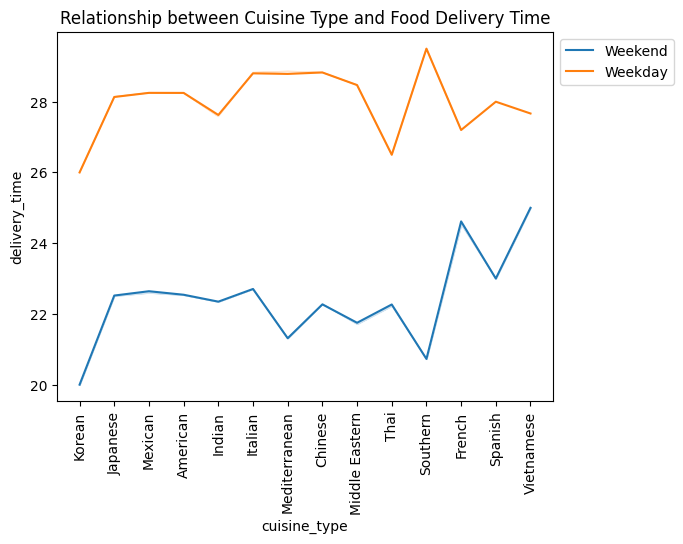

In [37]:
# Write the code here
sns.lineplot(data=df, x='cuisine_type', y='delivery_time', hue=('day_of_the_week'), errorbar=('ci', False))
plt.xticks(rotation=90)
plt.title('Relationship between Cuisine Type and Food Delivery Time')
plt.legend(bbox_to_anchor=[1, 1])
plt.show()

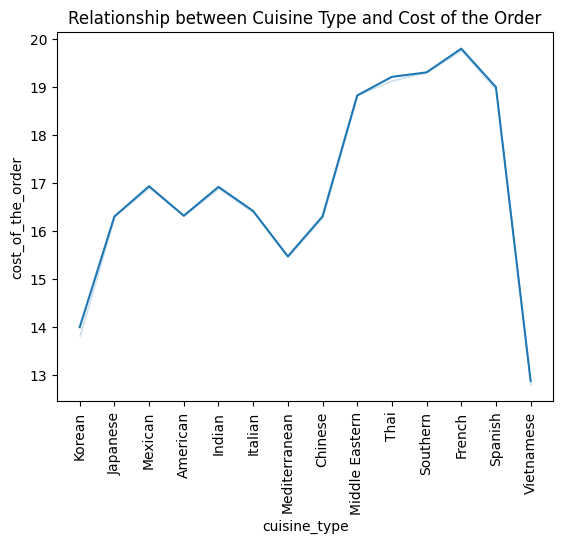

In [69]:
# Write the code here
sns.lineplot(data=df, x='cuisine_type', y='cost_of_the_order', errorbar=('ci', False))
plt.xticks(rotation=90)
plt.title('Relationship between Cuisine Type and Cost of the Order')
plt.show()

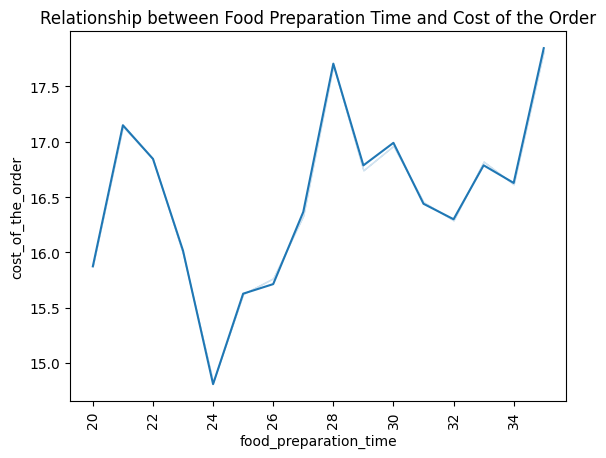

In [39]:
# Write the code here
sns.lineplot(data=df, x='food_preparation_time', y='cost_of_the_order', errorbar=('ci', False))
plt.xticks(rotation=90)
plt.title('Relationship between Food Preparation Time and Cost of the Order')
plt.show()

# From the below plot, when the food preparation time is high, cost of the order is also high (but it is not consistent)

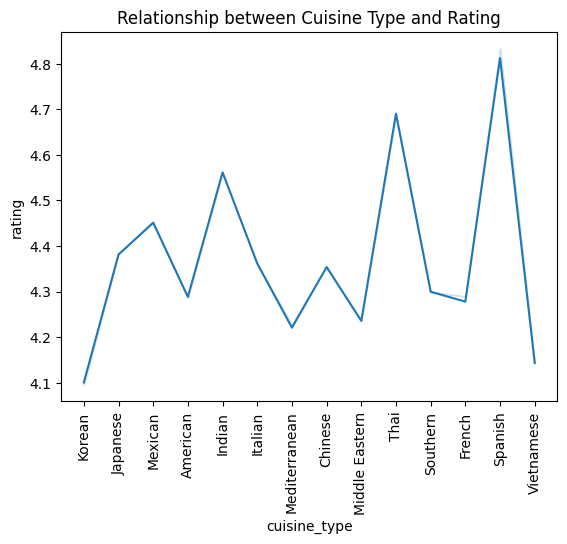

In [40]:
# Write the code here
sns.lineplot(data=df, x='cuisine_type', y='rating', errorbar=('ci', False))
plt.xticks(rotation=90)
plt.title('Relationship between Cuisine Type and Rating')
plt.show()


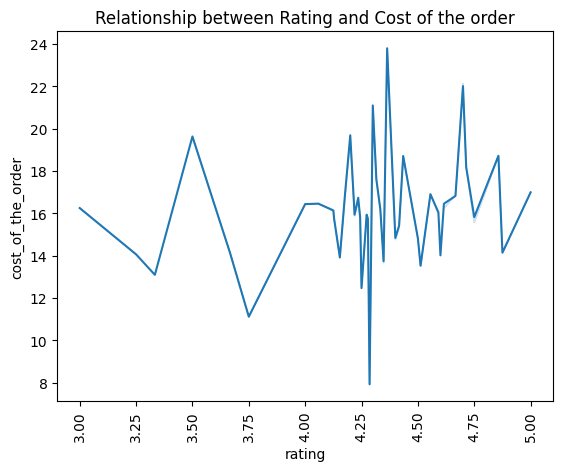

In [41]:
# Write the code here
sns.lineplot(data=df, x='rating', y='cost_of_the_order', errorbar=('ci', False))
plt.xticks(rotation=90)
plt.title('Relationship between Rating and Cost of the order')
plt.show()

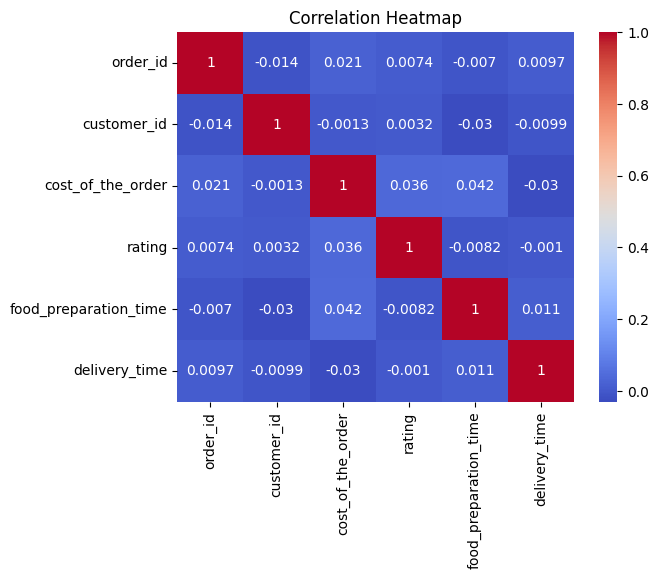

In [42]:
corr = df.corr(numeric_only=True)
sns.heatmap(data=corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Observations: it is observable that there is less correlation between delivery time and cost of the order, more correlation between food preparation time and cost of the order

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

#### Observations:


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [44]:
# Write the code here
# find the orders with the cost > 20 and compute 25% of the cost
df['net_revenue'] = df[df['cost_of_the_order'] > 20]['cost_of_the_order'] * 0.25

# # find the orders with the cost > 5 and compute 15% of the cost
df['net_revenue2'] = df[(df['cost_of_the_order'] > 5) & (df['cost_of_the_order'] <= 20)]['cost_of_the_order'] * 0.15

net_revenue = df['net_revenue'].sum() + df['net_revenue2'].sum()

print(f"The net revenue generated by the company across all orders: {net_revenue:.2f}")

The net revenue generated by the company across all orders: 6166.30


#### Observations:


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [45]:
# Write the code here
filtered_df = df[df.apply(lambda x: (x['food_preparation_time'] + x['delivery_time']) > 60, axis=1)]

percentage = (len(filtered_df)/len(df))*100

print(f"The percentage of orders take more than 60 minutes to get delivered from the time the order is placed: {percentage:.2f}%")


The percentage of orders take more than 60 minutes to get delivered from the time the order is placed: 10.54%


#### Observations:


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [46]:
df['day_of_the_week'].unique()

array(['Weekend', 'Weekday'], dtype=object)

In [47]:
# Write the code here
delivery_time_mean = df['delivery_time'].mean()
weekend_delivery_time_mean = df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()
weekdat_delivery_time_mean = df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()

print(f"The mean delivery time: {delivery_time_mean:.2f}")
print(f"The mean delivery time during weekdays: {weekdat_delivery_time_mean:.2f}")
print(f"The mean delivery time during weekends: {weekend_delivery_time_mean:.2f}")
print(f"Mean delivery time is higher during weekdays compared to weekends")

The mean delivery time: 24.16
The mean delivery time during weekdays: 28.34
The mean delivery time during weekends: 22.47
Mean delivery time is higher during weekdays compared to weekends


### Observations:
#### Based the analysis, following observations are made

Shake Shack has the most number of orders

The most popular cuisine is American

Mediterranean cuisine type has the highest cost with $35.41

Most of the orders (1242/ out of 1898) are rated more than 4

121 restaurants were rated 5 by the customers

14 cuisine types were rated 5 by customers

American, Chinese, French, Indian, Italian, Japanese, Korean, Mediterranean, Mexican, Middle Eastern, Southern, Spanish, Thai, Vietnamese cuisines has the highest rating of 5

There is less correlation between delivery time and cost of the order, more correlation between food preparation time and cost of the order

When the food preparation time is high, cost of the order is also high (but it is not consistent)

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
### Based the analysis, we can conlude

* Shake Shack has the most number of orders

* The most popular cuisine is American

* Most of the orders (1242/ out of 1898) are rated more than 4

* Delivery time is higher during weekdays compared to weekends

* 87.09% of orders take less than 60 minutes to get delivered from the time the order is placed

* 38.36% of orders take less than 50 minutes to get delivered from the time the order is placed

* 4.48% of orders take less than 40 minutes to get delivered from the time the order is placed

* 1343 out of total orders (1898) costs less than 20

* 1334 orders has cost greater than 5 and less than 20 so company charges 15% of the cost and generates net revenue (2477.58)

* 555 orders has cost greater than 20 so company charges 25% of the cost and generates net revenue (3688.73)


### Recommendations:

* In order to improve the business company can offer incentives like free meal to the customers who rate the restaurants so that the data doesn't have "Not Given" in the rating column

* Company can charge less on the restaurants who takes less time to prepare the food

* Company can charge less on the restaurants or offer promotional campaign who take more orders in a day

* Company can offer subscription option to customers in order to have more customer engagement resulting in more business

* On frequent orders to a particular restaurant, after certain number of orders (i.e more than 3), company can offer a free bundle/item on the next order


---